# Notebook for MAGWAS

The cell below initializes things and loads the pickled files.

In [ ]:
import csv
import pickle
run_to_case = dict()
run_to_covar = dict()
with open('metadata.csv', mode='r') as infile:
    reader = csv.DictReader(infile)
    mydict = [row for row in reader]

for patient in mydict:
    run = patient['Run']
    case = patient['Case_status']
    bases = patient['Bases']
    age = patient['Age_at_collection']
    
    sex = patient['sex']
    sex = 0 if sex == 'male' else 1
    
    alc = patient['Do_you_drink_alcohol']
    alc = 0 if alc == 'N' else 1
    
    lax = patient['Laxatives']
    lax = 0 if lax == 'N' else 1
    
    prob = patient['Probiotic']
    prob = 0 if prob == 'N' else 1
    
    pain = patient['Pain_med']
    pain = 0 if pain == 'N' else 1    
    
    dep = patient['Depression_anxiety_mood_med']
    dep = 0 if dep == 'N' else 1    
    
    anti = patient['Antihistamines']
    anti = 0 if anti == 'N' else 1    
    
    sleep = patient['sleep_aid']
    sleep = 0 if sleep == 'N' else 1
    
    run_to_case[run] = case
    #print(age,sex,alc,lax,prob,pain,dep,anti,sleep)
    run_to_covar[run] = [float(bases), float(age), sex, alc, lax, prob, pain, dep, anti, sleep]
  

results_file = "./wallen_uhgg_all_v0.5.tsv"
#results_file = "contain_results_c100_geq95.txt"
#results_file = "./no-adj_uhgg_c100_on_all_results.txt"
#prefix = ""
prefix = "98-v05-covs-"
#prefix = "95-fixed-covs-"


# LOAD EVERYTHING

In [3]:
with open(prefix + 'mag_points.pkl', 'rb') as file:
    mag_points = pickle.load(file)
    
with open(prefix + 'mag_abundances.pkl', 'rb') as file:
    mag_abundances = pickle.load(file)

with open(prefix + 'ani_run_vec.pkl', 'rb') as file:
    runs_to_ani_vec = pickle.load(file)

# Collect data. Takes about 30 minutes, CAREFUL!

In [13]:
from dataclasses import dataclass

@dataclass
class nn_res:
    ani: float
    run: str
    mag: str
    eff_cov: float

all_results = []
all_runs = set()
all_mags = set()

f = open(results_file,'r')
count = 0
next(f)
for line in f:
    if 'ANI' in line:
        continue
    spl = line.split()
    ani = float(spl[2])
    eff_cov = float(spl[3])
    run = spl[0].split('/')[-1].split('_')[0]
    mag = spl[1].split('/')[-1]
    all_results.append(nn_res(ani,run,mag,eff_cov))
    all_runs.add(run)
    all_mags.add(mag)
    count +=1
    if count % 1000000 == 0:
        print(count)
#PCA for all runs
from collections import defaultdict
import copy
subsampled_mags = sorted(list(all_mags))[0::100]
subsampled_mag_set = set(subsampled_mags)
zero_dict = dict()
for mag in subsampled_mags:
    zero_dict[mag] = 0
runs_to_ani_vec = defaultdict(dict)
for run in all_runs:
    runs_to_ani_vec[run] = copy.deepcopy(zero_dict)

mag_points = dict()
mag_abundances = dict()
nfive = dict()
zero = dict()

for run in all_runs:
    if "98" in prefix:
        nfive[run] = 98
    else:
        nfive[run] = 95
    zero[run] = 0
    
for mag in all_mags:
    mag_points[mag] = copy.deepcopy(nfive)
    mag_abundances[mag] = copy.deepcopy(zero)

for res in all_results:
    if "98" in prefix:
        if res.ani > 98:
            mag_points[res.mag][res.run] = res.ani
            mag_abundances[res.mag][res.run] = res.eff_cov / run_to_covar[res.run][0]
    else:
        mag_points[res.mag][res.run] = res.ani
        mag_abundances[res.mag][res.run] = res.eff_cov / run_to_covar[res.run][0]
    if res.mag in subsampled_mag_set:
        runs_to_ani_vec[res.run][res.mag] = res.ani

import pickle 

with open(prefix + 'mag_points.pkl', 'wb') as file:
    pickle.dump(mag_points, file)

with open(prefix + 'mag_abundances.pkl', 'wb') as file:
    pickle.dump(mag_abundances, file)
    
with open(prefix + 'ani_run_vec.pkl', 'wb') as file:
    pickle.dump(runs_to_ani_vec, file)
    

1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000
11000000
12000000
13000000
14000000
15000000
16000000
17000000
18000000
19000000
20000000
21000000
22000000
23000000
24000000
25000000
26000000
27000000
28000000
29000000
30000000
31000000
32000000
33000000
34000000
35000000
36000000
37000000
38000000
39000000
40000000
41000000
42000000
43000000
44000000
45000000
46000000
47000000
48000000
49000000
50000000
51000000
52000000
53000000
54000000
55000000
56000000
57000000
58000000


# Run PCA and visualize data. Pretty fast

             MGYG000000001.fa.gz  MGYG000000140.fa.gz  MGYG000000262.fa.gz  \
SRR19064419                  0.0                 0.00                98.64   
SRR19064428                  0.0                 0.00                 0.00   
SRR19064342                  0.0                98.62                98.47   
SRR19064337                  0.0                 0.00                 0.00   
SRR19064427                  0.0                 0.00                 0.00   

             MGYG000000450.fa  MGYG000000741.fa  MGYG000000934.fa  \
SRR19064419               0.0               0.0               0.0   
SRR19064428               0.0               0.0               0.0   
SRR19064342               0.0               0.0               0.0   
SRR19064337               0.0               0.0               0.0   
SRR19064427               0.0               0.0               0.0   

             MGYG000001120.fa  MGYG000001283.fa  MGYG000001528.fa  \
SRR19064419               0.0               0.0

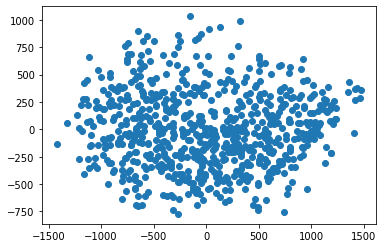


Principal Component 1: 12.02% of the variance
Principal Component 2: 3.58% of the variance
Principal Component 3: 2.91% of the variance
Principal Component 4: 2.65% of the variance
Principal Component 5: 2.41% of the variance


In [14]:
# PCA

import pickle 


from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt

# Here is your dictionary
d = runs_to_ani_vec
#print(d)
from sklearn.preprocessing import StandardScaler

# Convert your dictionary into a pandas DataFrame
df_pre = pd.DataFrame(d).T
df_pre = df_pre.fillna(0)

scaler = StandardScaler()

# Fit and transform the scaler to the data

#df = scaler.fit_transform(df_pre)
df = df_pre
print(df.head())
# Normalizing the data
#df = (df - df.mean()) / df.std()
# Perform PCA
pca = PCA(n_components=5)  # we're reducing to 2 features as your dictionary only have 2 features
principalComponents = pca.fit_transform(df)

# Create a DataFrame with the principal components for each data vector
principalDf = pd.DataFrame(data=principalComponents,
                           #columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'],
                           index=df_pre.index)

# If you want to retrieve the components for a specific vector:
sample1_components = principalDf.loc['SRR19064316']
print(list(sample1_components))
plt.scatter((principalDf.values)[:,0],(principalDf.values)[:,1])
plt.show()
print()
for i, variance in enumerate(pca.explained_variance_ratio_):
    print(f'Principal Component {i+1}: {variance * 100:.2f}% of the variance')
    



# Cell for plotting specific MAG effects

685


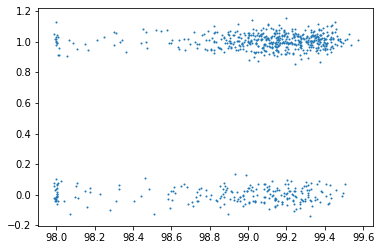

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  724
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.2181
Time:                        18:08:19   Log-Likelihood:                -355.63
converged:                       True   LL-Null:                       -454.84
Covariance Type:            nonrobust   LLR p-value:                 3.450e-37
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       -123.3432     24.873     -4.959      0.000    -172.094     -74.593
x1             1.2554      0.252      4.979      0.000       0.761       1.750
x2             0.0095      0.011      0.871      0.3

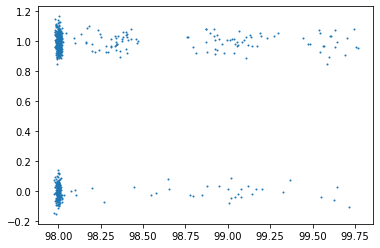

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  724
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1905
Time:                        18:08:19   Log-Likelihood:                -368.21
converged:                       True   LL-Null:                       -454.84
Covariance Type:            nonrobust   LLR p-value:                 5.835e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -21.3180     23.924     -0.891      0.373     -68.207      25.571
x1             0.2224      0.244      0.912      0.362      -0.256       0.700
x2             0.0147      0.011      1.375      0.1

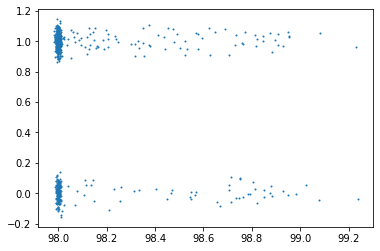

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  724
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1961
Time:                        18:08:19   Log-Likelihood:                -365.63
converged:                       True   LL-Null:                       -454.84
Covariance Type:            nonrobust   LLR p-value:                 4.969e-33
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         89.6395     36.093      2.484      0.013      18.899     160.380
x1            -0.9082      0.368     -2.471      0.013      -1.629      -0.188
x2             0.0143      0.011      1.319      0.1

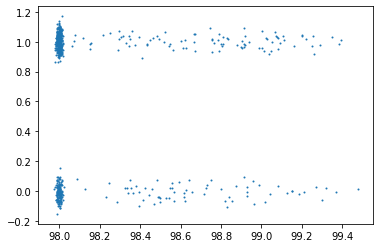

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  724
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1929
Time:                        18:08:19   Log-Likelihood:                -367.09
converged:                       True   LL-Null:                       -454.84
Covariance Type:            nonrobust   LLR p-value:                 1.997e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.2934     25.304      1.790      0.073      -4.302      94.888
x1            -0.4559      0.257     -1.772      0.076      -0.960       0.048
x2             0.0143      0.011      1.329      0.1

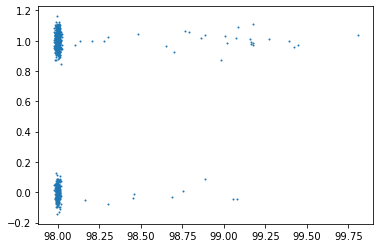

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  724
Model:                          Logit   Df Residuals:                      713
Method:                           MLE   Df Model:                           10
Date:                Sat, 23 Dec 2023   Pseudo R-squ.:                  0.1910
Time:                        18:08:19   Log-Likelihood:                -367.98
converged:                       True   LL-Null:                       -454.84
Covariance Type:            nonrobust   LLR p-value:                 4.679e-32
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -55.6693     51.865     -1.073      0.283    -157.322      45.983
x1             0.5723      0.529      1.083      0.279      -0.464       1.608
x2             0.0159      0.011      1.478      0.1

In [20]:
## import pickle 
import numpy as np
import statsmodels.api as sm

import matplotlib
#matplotlib.use('pdf')
import matplotlib.pyplot as plt
#noise = np.array(range(len(y))) * 0.001
#igh
mag1 = 'MGYG000162149.fa.gz'
#low
mag2 = 'MGYG000076696.fa'

mag3 = 'MGYG000087685.fa'

mag4 = 'MGYG000207059.fa'

mag5 = 'MGYG000049420.fa'
mags = [mag1, mag2, mag3, mag4, mag5]
for mag in mags:
    # import numpy as np

    dicts = mag_points[mag]
    l = [[ run_to_case[a],b, mag_abundances[mag][a] * 10000000] + run_to_covar[a][1:] for a,b in dicts.items()]
    X = np.array([[p[1]] + p[3:] for p in l])
    #X = np.array([[p[1]] for p in l])
    y = np.array([0 if p[0] =='Control' else 1 for p in l])
    noise = np.random.normal(0,.05,len(y))

    #print(len(X))
    #print(sorted(zip(X,y)))
    y_n = y + noise
    ind = 0
    X_n = X[:,ind] + np.random.normal(0,(np.max(X[:,ind]) - np.min(X[:,ind]))/200,len(X[:,ind]))
    print(len([x for x in X[:,ind] if x > 98]))
    plt.plot(X_n, y_n,'o', ms = 1)
    #print(X,y)
    plt.show()

    X = sm.add_constant(X)

    # Perform logistic regression
    model = sm.Logit(y, X)
    result = model.fit(method='newton', disp = 0, maxiters=100)
    print(result.summary())
    print(result.pvalues)

# Perform regression and get p-values

In [16]:
import numpy as np
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')
# Initialize a dictionary to store results
results = {}
count = 0
for mag,dicts in sorted(list(mag_points.items())):
    #if count == 1000:
    #    break
    #mag = 'MGYG000000001.fa'
    #dicts = mag_points[mag]
    #print(result.summary())
    
    l = [[ run_to_case[a],b, mag_abundances[mag][a] * 10000000] + run_to_covar[a][1:] for a,b in dicts.items()]
    X = np.array([[p[1]] + p[3:] for p in l])
    #l = [[ run_to_case[a],b] + list(principalDf.loc[a]) for a,b in dicts.items()]
    #if '98' in prefix:
    #    X = np.array([p[1:4] for p in l])
    #else:
    #    X = np.array([p[1:6] for p in l])
    ani = np.array([p[1] for p in l])
    y = np.array([0 if p[0]=='Control' else 1 for p in l])
    is_same = np.all(ani == ani[0])
    if is_same:
        print('is same:' + mag)
        continue
    # Add constant to the predictor (required for statsmodels)
    X = sm.add_constant(X)

    # Perform logistic regression
    model = sm.Logit(y, X)
    
    try:
        result = model.fit(method='newton', disp = 0, maxiters=200)
        count += 1
        if not result.converged:
            continue
        # Store the result summary into the dictionary
        if len(result.pvalues) >= 2:
            results[mag] = [result.pvalues[1], result.pvalues[2], result.params[1], result.params[2]]  # p-value for x coefficient
            if count % 1000 == 0:
                #print(mag,result.pvalues[1], result.pvalues[2], result.params[1], result.params[2])
                print(mag,result.pvalues[1], result.pvalues[2])
    except:
        print('singular')

import pickle 

with open(prefix + 'p_vals_mags.pkl', 'wb') as file:
    pickle.dump(results, file)

is same:MGYG000000415.fa
is same:MGYG000000540.fa
is same:MGYG000000679.fa
singular
is same:MGYG000000925.fa
is same:MGYG000000949.fa
singular
is same:MGYG000001876.fa
MGYG000001921.fa 0.8900560728024771 0.1588008851646604
singular
singular
singular
singular
singular
is same:MGYG000003345.fa
is same:MGYG000003742.fa
MGYG000003987.fa 0.0031891866711869655 0.20997189500736935
singular
singular
is same:MGYG000005140.fa
singular
singular
MGYG000005676.fa 0.2703974704906098 0.15785973559431887
is same:MGYG000006306.fa
singular
singular
MGYG000007135.fa 0.6007023345216005 0.1592751583045765
MGYG000008226.fa 0.8831493235820351 0.15753777330452068
is same:MGYG000008401.fa
MGYG000009331.fa 0.4839076153970783 0.16177197050686365
MGYG000010426.fa 0.08980470151131828 0.19380938665490843
singular
singular
MGYG000011518.fa 0.6053560779814895 0.1668298761609598
singular
MGYG000012609.fa 0.44557041102470285 0.15833107444460892
is same:MGYG000012884.fa
MGYG000013710.fa 0.08013467387376082 0.17924493224

MGYG000133891.fa.gz 0.04525818324961349 0.2073977106297522
singular
MGYG000134988.fa.gz 0.10065230374249126 0.1676901436247592
MGYG000136091.fa.gz 0.2660267841408277 0.17387642211752097
MGYG000137194.fa.gz 0.5614683767438617 0.1538993904872652
is same:MGYG000137771.fa.gz
is same:MGYG000137823.fa.gz
singular
MGYG000138318.fa.gz 0.5107711488810395 0.15818690755382647
MGYG000139428.fa.gz 0.6000007802570584 0.15788963409695655
is same:MGYG000139536.fa.gz
singular
is same:MGYG000140510.fa.gz
MGYG000140530.fa.gz 0.8339295198212116 0.15619283465762637
singular
MGYG000141627.fa.gz 0.4375444510835461 0.14554727990120195
MGYG000142743.fa.gz 0.5905084477440159 0.1767164697611533
is same:MGYG000143707.fa.gz
is same:MGYG000143816.fa.gz
MGYG000143855.fa.gz 0.4078916587164615 0.18920568075330757
MGYG000144962.fa.gz 0.21738706063086943 0.12145408894073051
is same:MGYG000145307.fa.gz
singular
singular
MGYG000146095.fa.gz 0.32623591695874343 0.16781346857205226
MGYG000147200.fa.gz 0.1879032469081825 0.1

MGYG000265207.fa 0.37833468062671305 0.1614967214317492
MGYG000266304.fa 0.8248400795314471 0.16926658415753248
singular
MGYG000268518.fa 0.8404619247469232 0.16687636672768846
MGYG000269609.fa 0.24185701078714794 0.15542649411229345
is same:MGYG000269998.fa
MGYG000270706.fa 0.4685934869754478 0.16128029075387307
MGYG000271814.fa 0.6941868140799119 0.14745478628066344
singular
MGYG000272917.fa 0.085328617915835 0.13675400566084006
singular
MGYG000274030.fa 0.42088428160824976 0.14379903914734843
singular
is same:MGYG000274951.fa
MGYG000275108.fa 0.6957997464876418 0.16103070915845774
singular
MGYG000276208.fa 0.3816183554045719 0.14107148762493196
singular
singular
MGYG000277321.fa 0.8515978256236922 0.1630185004041278
MGYG000278421.fa 0.1064904132019575 0.18695160994283044
MGYG000279537.fa 0.3802718577983949 0.1587209294370473
MGYG000280633.fa 0.033906176341688826 0.21706502034162134
singular
singular
MGYG000282837.fa 0.9818761829798658 0.16551671826175174
is same:MGYG000283086.fa
MGY

# Loading p-values without rerunning everything

In [157]:
import pickle 

with open(prefix + 'p_vals_mags.pkl', 'rb') as file:
    results = pickle.load(file)

# Writing result files

In [25]:
mag_order = []
c = 0
order_comps = dict()
for line in open('./95_order_components.txt','r'):
    if line != "\n":
        mag = line.split('/')[-1].split('.')[0]
        order_comps[mag] = c
        mag_order.append(mag)
    else:
        c+=1
    
        
mag_res = []
connected_comps = dict()
for line in open('./genomes-all_metadata.tsv','r'):
    spl = line.split()
    connected_comps[spl[0]] = spl[13] 
        
used_mag = set()
p_val = []
for mag in mag_order:
    m = mag.split('/')[-1]
    if m + '.fa' in results:
        if m not in used_mag:
            p_val.append([results[m + '.fa'],connected_comps[m],m])
        used_mag.add(m)
    elif m + '.fa.gz' in results:
        if m not in used_mag:
            p_val.append([results[m + '.fa.gz'],connected_comps[m],m])
        used_mag.add(m)



write = open(prefix + 'ordered_pvals.txt','w')
rep_to_c = dict()
count = 0
for v,c,mag in p_val:
    for val in v:
        write.write(str(val) + "\t")
    if c not in rep_to_c:
        rep_to_c[c] = count
        count += 1
    color = rep_to_c[c]
    write.write(str(color) + '\t' + mag + '\n')
write.close()

print(prefix)

98-v05-covs-
